<a href="https://colab.research.google.com/github/jtruyu/Admision-UNI-2024-1/blob/main/Atp%202017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRABAJO FINAL DE REDES COMPLEJAS: GRUPO 5**

Se cargan las siguientes librerías:

In [ ]:
import networkx as nx

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Pregunta 1.1: Explique en detalle las características de la red elegida.**


Se escoge la red correspodiente a la temporada 2017 del torneo ATP (Asociación de Tenistas Profesionales). Se busca mostrar los cruces de partidos entre los jugadores que forman parte de la temporada que es producto de la evaluación. Previamente se carga el archivo con la data en el Colab y se genera el data frame.

In [ ]:
df_atp = pd.read_excel("e.xlsx")

**Pregunta 1.2: Explique la importancia de la red, especialmente si se puede utilizar para un contexto nacional en Perú.**


La importancia de la red propuesta radica en que nos permite ver la relación entre jugadores que disputan un encuentro. Se puede encontrar jugadores que pueden tener varios partidos disputados y jugadores con pocas conexiones pero que presentan un mejor ranking dentro del torneo. Esto se podría aplicar en otras disciplinas deportivas, sea entre jugadores individuales como equipos, así como dentro del contexto peruano.

In [ ]:
##Cargar los datos en un grafo networkx, donde selecciono de la data las columnas perdedor (loser_name)
##y ganador (winner_name), mediante grafo dirigido:
G = nx.from_pandas_edgelist(df_atp, "loser_name", "winner_name",create_using=nx.DiGraph())

In [ ]:
#Genero la posición del grafo mediante el método de spring layout:
pos = nx.spring_layout(G)

 ...]

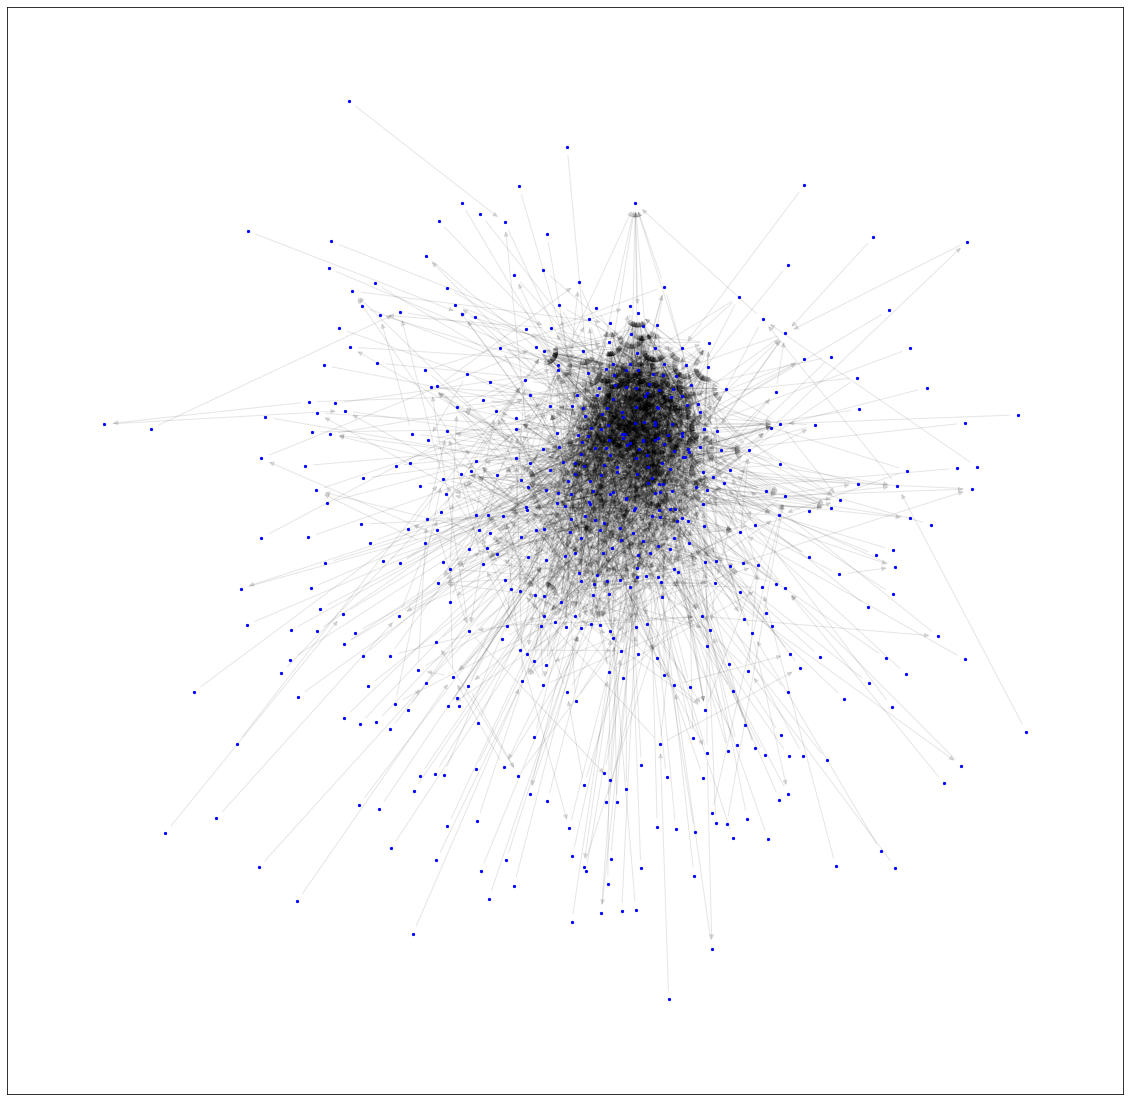

In [ ]:
#Graficamos el grafo.
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(G, pos, node_size=5, node_color='b')
nx.draw_networkx_edges(G, pos, alpha=.1)

In [ ]:
#¿Cuántos jugadores y partidos están representadas en el gráfico?
print(nx.info(G))
#Existen 528 jugadores y 3545 partidos

DiGraph with 528 nodes and 3545 edges


In [ ]:
#Calcular el Page Rank de este grafo
pagerank = nx.pagerank(G)
print(pagerank)

{'Ernesto Escobedo': 0.004320199914337694, 'Adam Pavlasek': 0.00045897831096803666, 'Arthur De Greef': 0.0018745755038760202, 'Adrian Bodmer': 0.00044342947444545266, 'Andreas Seppi': 0.0038144475142981643, 'Adrian Mannarino': 0.009017361279594911, 'Benjamin Becker': 0.0010480110677825328, 'Bjorn Fratangelo': 0.003737093808573133, 'Borna Coric': 0.0070449530482594586, 'Daniil Medvedev': 0.00576355089098403, 'David Ferrer': 0.006926447694707717, 'Denis Shapovalov': 0.005224352567463216, 'Dudi Sela': 0.0037087450070082155, 'Feliciano Lopez': 0.006392037689337531, 'Fernando Verdasco': 0.007164143501460728, 'Gael Monfils': 0.004711716335393056, 'Go Soeda': 0.0008064210212258068, 'Guillermo Garcia-Lopez': 0.0030502929236104893, 'Hyeon Chung': 0.007803252647311346, 'Jared Donaldson': 0.006632280570408588, 'Jason Jung': 0.000386473295206311, 'Jaume Munar': 0.00028409090909090913, 'Jiri Vesely': 0.0041977221608260305, 'Jordan Thompson': 0.00363705088734996, 'Jo-Wilfried Tsonga': 0.009893346457

In [ ]:
##¿Cuáles son las cuentas más importantes según su PageRank?
import operator

ordenar_pagerank = sorted(pagerank.items(), key=operator.itemgetter(1), reverse=True)
print(ordenar_pagerank[:5])

[('Rafael Nadal', 0.018504583233529107), ('David Goffin', 0.01739901509657454), ('Alexander Zverev', 0.016739857949987863), ('Roger Federer', 0.014824644214777319), ('Dominic Thiem', 0.01369982144057408)]


In [ ]:
##Generamos el archivo en formato Gephi, para usarlo en su aplicación.
nx.write_gexf(G,'atp2017_3.gexf')

**Tarea 2: Métricas de red de cómputo**

**Pregunta 2.1: Calcule los nodos “centrales” y clasifíquelos en la red.**

In [ ]:
##Cargamos la librería operator e importamos el comando itemgetter
from operator import itemgetter

In [ ]:
##Calculamos el grado de centralidad para cada jugador invocando el comando nx.degree_centrality
sorted_degree = sorted(nx.degree_centrality(G).items(), key=itemgetter(1), reverse=True)
print(sorted_degree)

[('David Goffin', 0.11954459203036054), ('Dominic Thiem', 0.11764705882352941), ('Alexander Zverev', 0.11195445920303605), ('Rafael Nadal', 0.11195445920303605), ('Adrian Mannarino', 0.11005692599620494), ('Benoit Paire', 0.11005692599620494), ('Diego Schwartzman', 0.11005692599620494), ('Albert Ramos-Vinolas', 0.10815939278937381), ('Roberto Bautista Agut', 0.10815939278937381), ('Damir Dzumhur', 0.1062618595825427), ('Kyle Edmund', 0.1062618595825427), ('Andrey Rublev', 0.10246679316888045), ('Jan-Lennard Struff', 0.10246679316888045), ('Grigor Dimitrov', 0.10246679316888045), ('Nikoloz Basilashvili', 0.10246679316888045), ('Pablo Carreno Busta', 0.10056925996204934), ('Mischa Zverev', 0.10056925996204934), ('Marin Cilic', 0.09867172675521822), ('Jared Donaldson', 0.0967741935483871), ('Paolo Lorenzi', 0.0967741935483871), ('Sam Querrey', 0.0967741935483871), ('Fabio Fognini', 0.0967741935483871), ('Dusan Lajovic', 0.0967741935483871), ('Alexandr Dolgopolov', 0.0967741935483871), ('J

In [ ]:
##Ejecutamos el comando anterior, pero con la diferencia que aparecerán los 5 principales nodos
##centrales de la red.
sorted_ = sorted(nx.in_degree_centrality(G).items(), key=itemgetter(1), reverse=True)
print(sorted_[:5])
##Los 5 principales centros o nodos son Rafael Nadal, David Goffin, Alexander Zverev, Roberto Bautista Agut
##y Dominic Thiem.

[('Rafael Nadal', 0.09487666034155598), ('David Goffin', 0.08349146110056926), ('Alexander Zverev', 0.07969639468690702), ('Roberto Bautista Agut', 0.07590132827324478), ('Dominic Thiem', 0.07590132827324478)]


In [ ]:
sorted = sorted(nx.out_degree_centrality(G).items(), key=itemgetter(1), reverse=True)
print(sorted)


[('Nikoloz Basilashvili', 0.05692599620493359), ('Benoit Paire', 0.05502846299810247), ('Paolo Lorenzi', 0.051233396584440226), ('Albert Ramos-Vinolas', 0.051233396584440226), ('Dusan Lajovic', 0.051233396584440226), ('Joao Sousa', 0.04933586337760911), ('Jared Donaldson', 0.04743833017077799), ('Andrey Rublev', 0.04743833017077799), ('Jan-Lennard Struff', 0.04743833017077799), ('Mikhail Youzhny', 0.04743833017077799), ('Kyle Edmund', 0.04743833017077799), ('Thiago Monteiro', 0.04554079696394687), ('Diego Schwartzman', 0.04554079696394687), ('Mischa Zverev', 0.04554079696394687), ('Adrian Mannarino', 0.043643263757115754), ('Daniil Medvedev', 0.043643263757115754), ('Feliciano Lopez', 0.043643263757115754), ('Robin Haase', 0.043643263757115754), ('Andrey Kuznetsov', 0.043643263757115754), ('Fernando Verdasco', 0.04174573055028463), ('Damir Dzumhur', 0.04174573055028463), ('Denis Istomin', 0.04174573055028463), ('Gilles Simon', 0.04174573055028463), ('Alexandr Dolgopolov', 0.04174573055

**Pregunta 2.2: ¿Tiene su red una propiedad de mundo pequeño? pruébalo si es así, o si no.**

<BarContainer object of 57 artists>

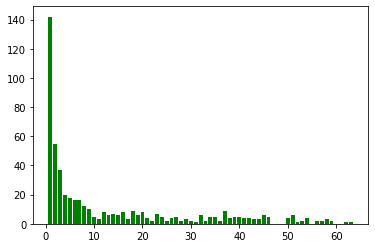

In [ ]:
##En la red se aprecia la propiedad del mundo pequeño.
##Power Law: de la libería collections importamos el comando Counter, para poder
##calcular los grados.
from collections import Counter
grados = [G.degree(u) for u in G.nodes()]
plt.bar(Counter(grados).keys(), Counter(grados).values(), color='g')

In [ ]:
##Small World: calculamos el camino promedio más corto hacia otro nodo
##Esta arroja un promedio de 2.05
print(nx.average_shortest_path_length(G))

2.053838910930941


In [ ]:
##Calculamos el camino más corto para llegar a uno de los jugadores
##En este caso será con Alexander Zverev.
p = nx.shortest_path_length(G, source="Alexander Zverev")
print("Caminos mas corto: ",p)

distancias = [v[1] for v in p.items()]

#contar la cantidad de tenistas con una distancia de 1 a 3 al nodo Alexander Zverev
p_sum = 0
for d in distancias:
  if d > 0 and d <= 3:
    p_sum += 1
print("Cantidad de tenistas: ",p_sum)

#dividir la fracción de nodos alcanzables a partir del nodo Alexander Zverev con 3 o mas tenistas
fraccion = p_sum / len(G.nodes())
print("Fraccion de nodos alcanzables: ",fraccion)

Caminos mas corto:  {'Alexander Zverev': 0, 'Pablo Cuevas': 1, 'Jack Sock': 1, 'Nick Kyrgios': 1, 'Hyeon Chung': 1, 'Robin Haase': 1, 'Milos Raonic': 1, 'Roger Federer': 1, 'Jo-Wilfried Tsonga': 1, 'Borna Coric': 1, 'Frances Tiafoe': 1, 'Nicolas Mahut': 1, 'Dominic Thiem': 1, 'Rafael Nadal': 1, 'Damir Dzumhur': 1, 'Juan Martin del Potro': 1, 'Gilles Muller': 1, 'Fernando Verdasco': 1, 'Ruben Bemelmans': 2, 'Marcel Granollers': 2, 'Denis Shapovalov': 2, 'Lucas Pouille': 2, 'Marin Cilic': 2, 'Yoshihito Nishioka': 2, 'Tim Smyczek': 2, 'Kyle Edmund': 2, 'Gilles Simon': 2, 'Guido Pella': 2, 'Donald Young': 2, 'Jared Donaldson': 2, 'Steve Johnson': 2, 'Dusan Lajovic': 2, 'Ramkumar Ramanathan': 2, 'Novak Djokovic': 2, 'Grigor Dimitrov': 2, 'Thanasi Kokkinakis': 2, 'Ernests Gulbis': 2, 'Feliciano Lopez': 2, 'Tomas Berdych': 2, 'Alex de Minaur': 2, 'Yannick Hanfmann': 2, 'Jan-Lennard Struff': 2, 'Henri Laaksonen': 2, 'Jeremy Chardy': 2, 'Fabio Fognini': 2, 'David Ferrer': 2, 'Arthur De Greef': 

{'Alexander Zverev': 0, 'Pablo Cuevas': 1, 'Jack Sock': 1, 'Nick Kyrgios': 1, 'Hyeon Chung': 1, 'Robin Haase': 1, 'Milos Raonic': 1, 'Roger Federer': 1, 'Jo-Wilfried Tsonga': 1, 'Borna Coric': 1, 'Frances Tiafoe': 1, 'Nicolas Mahut': 1, 'Dominic Thiem': 1, 'Rafael Nadal': 1, 'Damir Dzumhur': 1, 'Juan Martin del Potro': 1, 'Gilles Muller': 1, 'Fernando Verdasco': 1, 'Ruben Bemelmans': 2, 'Marcel Granollers': 2, 'Denis Shapovalov': 2, 'Lucas Pouille': 2, 'Marin Cilic': 2, 'Yoshihito Nishioka': 2, 'Tim Smyczek': 2, 'Kyle Edmund': 2, 'Gilles Simon': 2, 'Guido Pella': 2, 'Donald Young': 2, 'Jared Donaldson': 2, 'Steve Johnson': 2, 'Dusan Lajovic': 2, 'Ramkumar Ramanathan': 2, 'Novak Djokovic': 2, 'Grigor Dimitrov': 2, 'Thanasi Kokkinakis': 2, 'Ernests Gulbis': 2, 'Feliciano Lopez': 2, 'Tomas Berdych': 2, 'Alex de Minaur': 2, 'Yannick Hanfmann': 2, 'Jan-Lennard Struff': 2, 'Henri Laaksonen': 2, 'Jeremy Chardy': 2, 'Fabio Fognini': 2, 'David Ferrer': 2, 'Arthur De Greef': 2, 'Tommy Paul': 2, 

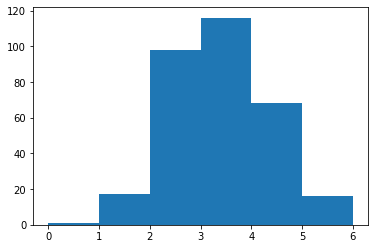

In [ ]:
##Generamos el histograma para la distancia más corta para llegar a enfrentar a Zverev.
distancias_de_alex = nx.shortest_path_length(G, source="Alexander Zverev")
print(distancias_de_alex)
h = plt.hist(distancias_de_alex.values(), bins=6)

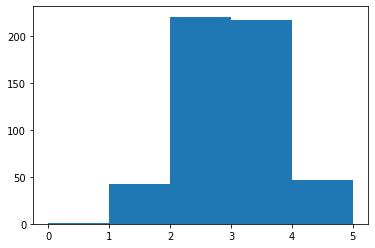

In [ ]:
distancias_a_alex = nx.shortest_path_length(G, target="Alexander Zverev")
h = plt.hist(distancias_a_alex.values(),bins=5)

**Pregunta 2.3: Simule su red con un grafo aleatorio similar.**

In [ ]:
##Listamos los 5 principales nodos
list_nodes=[a[0] for a in sorted_[:5]]

 ...]

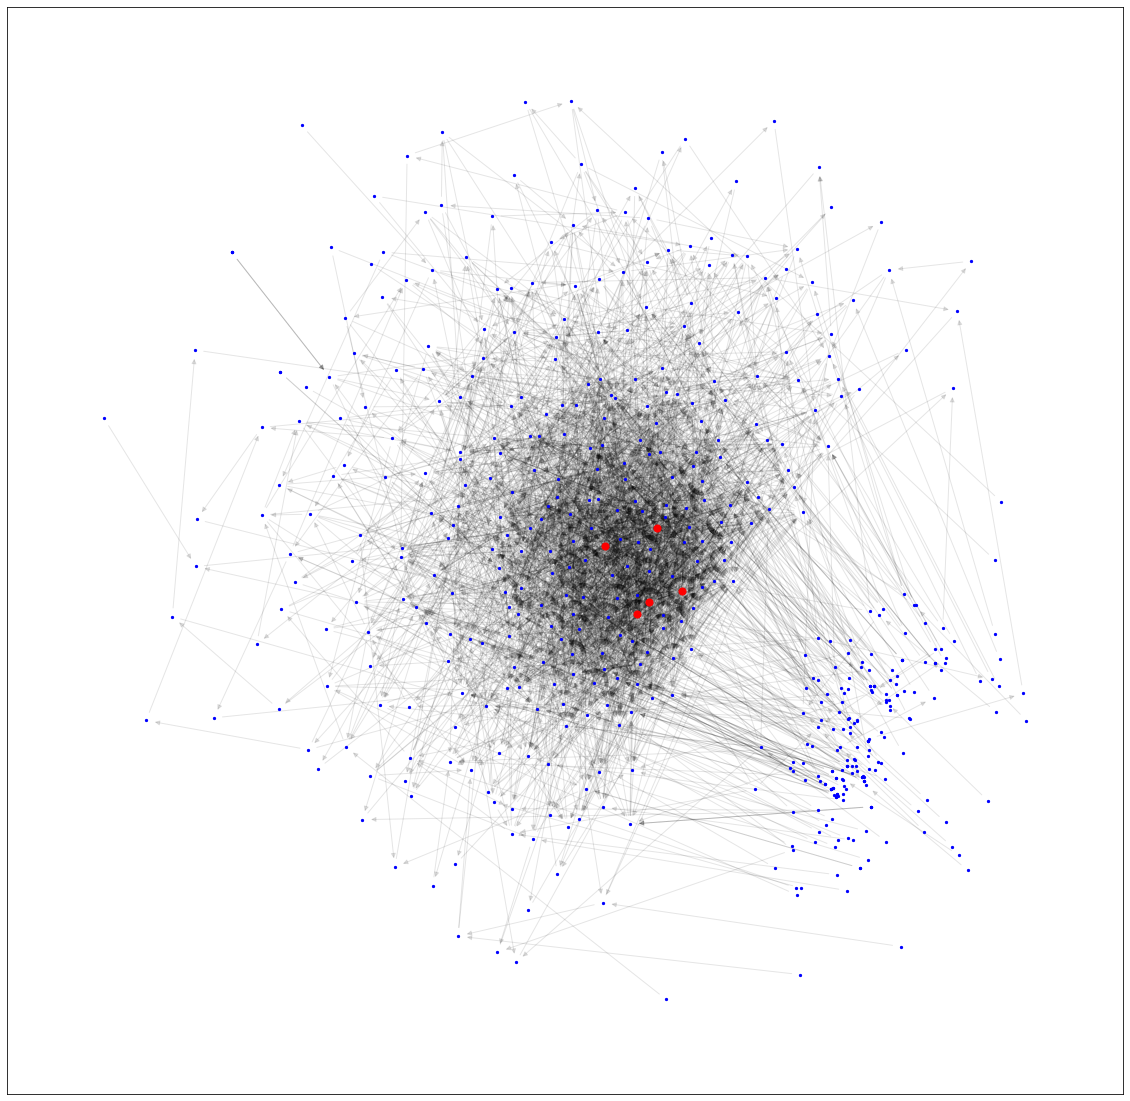

In [ ]:
##Invocamos el comando nx.kamada_kawai_layout
pos2=nx.kamada_kawai_layout(G)
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(G, pos2, node_size=5, node_color='b')
nx.draw_networkx_nodes(G, pos2,list_nodes ,node_size=50, node_color='r')
nx.draw_networkx_edges(G, pos2, alpha=.1)

In [ ]:
grafo2 = nx.havel_hakimi_graph(grados)

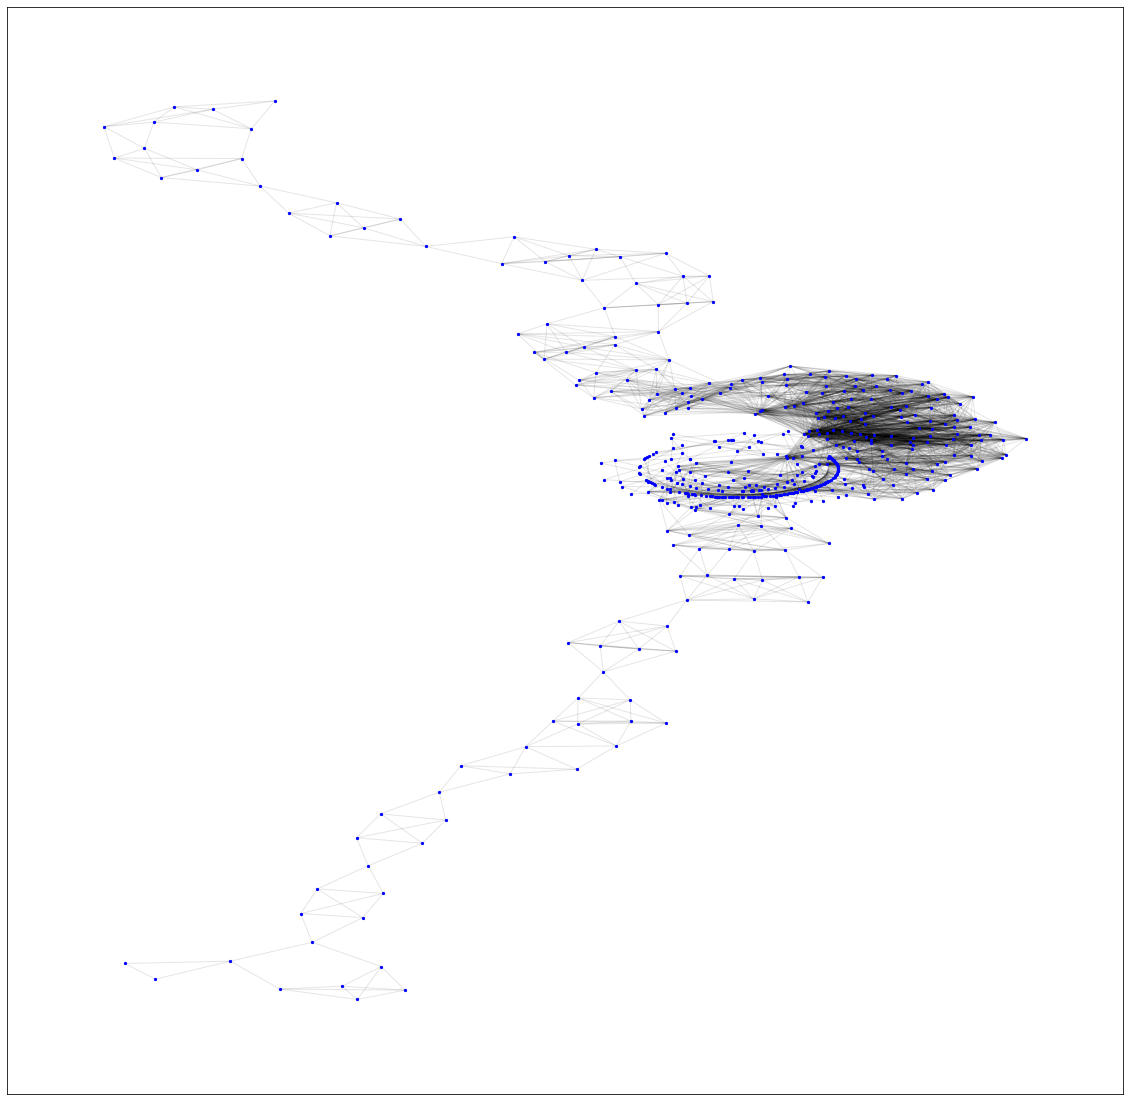

In [ ]:
pos2=nx.kamada_kawai_layout(grafo2)
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(grafo2, pos2, node_size=5, node_color='b')
#nx.draw_networkx_nodes(G, pos2,list_nodes2 ,node_size=50, node_color='r')
nx.draw_networkx_edges(grafo2, pos2, alpha=.1)

**Pregunta 2.4: ¿El gráfico aleatorio simulado tuvo el mismo comportamiento que la red original? si no, ¿por qué?**

In [ ]:
nx.average_clustering(grafo2)

0.4553241361366472

{0: 0, 259: 1, 5: 1, 7: 1, 9: 1, 138: 1, 139: 1, 141: 1, 15: 1, 144: 1, 145: 1, 18: 1, 22: 1, 23: 1, 152: 1, 153: 1, 154: 1, 28: 1, 161: 1, 162: 1, 291: 1, 163: 1, 37: 1, 38: 1, 39: 1, 183: 1, 314: 1, 60: 1, 62: 1, 64: 1, 66: 1, 67: 1, 71: 1, 72: 1, 73: 1, 209: 1, 81: 1, 212: 1, 86: 1, 241: 1, 243: 1, 245: 1, 253: 1, 2: 2, 4: 2, 6: 2, 8: 2, 10: 2, 13: 2, 14: 2, 19: 2, 24: 2, 27: 2, 29: 2, 31: 2, 33: 2, 36: 2, 41: 2, 46: 2, 47: 2, 51: 2, 54: 2, 58: 2, 61: 2, 68: 2, 69: 2, 70: 2, 75: 2, 76: 2, 78: 2, 80: 2, 82: 2, 83: 2, 84: 2, 87: 2, 89: 2, 91: 2, 104: 2, 107: 2, 109: 2, 111: 2, 114: 2, 117: 2, 118: 2, 120: 2, 122: 2, 124: 2, 128: 2, 133: 2, 140: 2, 142: 2, 143: 2, 146: 2, 147: 2, 148: 2, 149: 2, 151: 2, 158: 2, 159: 2, 164: 2, 165: 2, 167: 2, 169: 2, 170: 2, 171: 2, 185: 2, 187: 2, 188: 2, 201: 2, 205: 2, 207: 2, 208: 2, 211: 2, 213: 2, 214: 2, 215: 2, 223: 2, 224: 2, 234: 2, 239: 2, 240: 2, 242: 2, 244: 2, 249: 2, 262: 2, 273: 2, 277: 2, 281: 2, 293: 2, 294: 2, 295: 2, 304: 2, 323: 2,

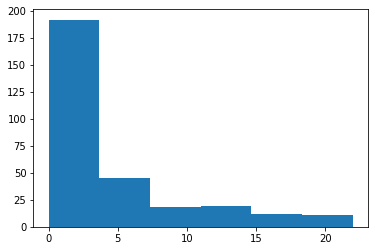

In [ ]:
##Generamos el histograma para la distancia más corta para llegar a enfrentar a "0".
distancias_de_0 = nx.shortest_path_length(grafo2, source=0)
print(distancias_de_0)
h = plt.hist(distancias_de_0.values(), bins=6)

Morfológicamente en buena parte son diferentes los gráficos. Esto se debe a que se está empleando el método Kamada-Kawai, esté al momento de graficar en cada paso solo mueve un nodo a una posición estable, el resto de nodos queda fijo, por ende, la forma del gráfico dependerá del nodo (tenista) por el cual empiece a trabajar el algoritmo. Lo que si se aprecia es que en el centro está mostrando gran cantidad de relaciones, mientras que en los bordes se muestran un alto grado de dispersión. Además, se muestra que el grafo real y simulado tiene valores muy diferentes de coeficiente de clustering y de camino promedio más corto a un nodo.

**Pregunta 2.5: Calcule el coeficiente de agrupamiento de la red. ¿Qué dice este valor sobre esta red?**

In [ ]:
##Generamos el promedio de la agrupación o clustering
##Esta arroja 0.04, que es cercano a cero (0) lo que significa que casi
##no hay conexiones en entre los tenistas, es decir que no juegan todos contra todos
nx.average_clustering(G)

0.04373081232426013

**Tarea 3: Visualización**

**Pregunta 3.1: Detecta comunidades en su red con algunos métodos.**

In [ ]:
G2 = G.to_undirected()

In [ ]:
pos3=nx.kamada_kawai_layout(G2)

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
from matplotlib.pyplot import cm

In [ ]:
comunidades = girvan_newman(G2)

[['Felipe Meligeni Rodrigues Alves', 'Alexios Halebian', 'Oliver Marach', 'Marcel Granollers', 'Duckhee Lee', 'Yoshihito Nishioka', 'Marcelo Arevalo', 'Pedro Sousa', 'Donald Young', 'Omar  Alawadhi', 'Gregoire Barrere', 'John-Patrick Smith', 'Hugo Nys', 'Stefano Travaglia', 'Steve Johnson', 'Dmitry Tursunov', 'Jose Hernandez-Fernandez', 'Yasutaka Uchiyama', 'Oscar Otte', 'Mikael Ymer', 'Guillermo Duran', 'Gilles Muller', 'Yosuke Watanuki', 'Noah Rubin', 'Fajing Sun', 'Samuel Monette', 'Novak Djokovic', 'Denis Matsukevich', 'Maximilian Marterer', 'Maxime Janvier', 'Mikhail Elgin', 'Ivan Nedelko', 'Lucas Catarina', 'Yan Bai', 'Marco Chiudinelli', 'Lorenzo Giustino', 'Evan Song', 'Alexander Ward', 'Carlos Taberner', 'Radek Stepanek', 'Teymuraz Gabashvili', 'Tobias Kamke', 'Mathias Bourgue', 'Rigele Te', 'Sasi Kumar Mukund', 'Henri Laaksonen', 'James McGee', 'Ze Zhang', 'Takanyi Garanganga', 'David Ferrer', 'Arthur De Greef', 'Fred Simonsson', 'Filip Horansky', 'Tommy Haas', 'Nikola Miloje

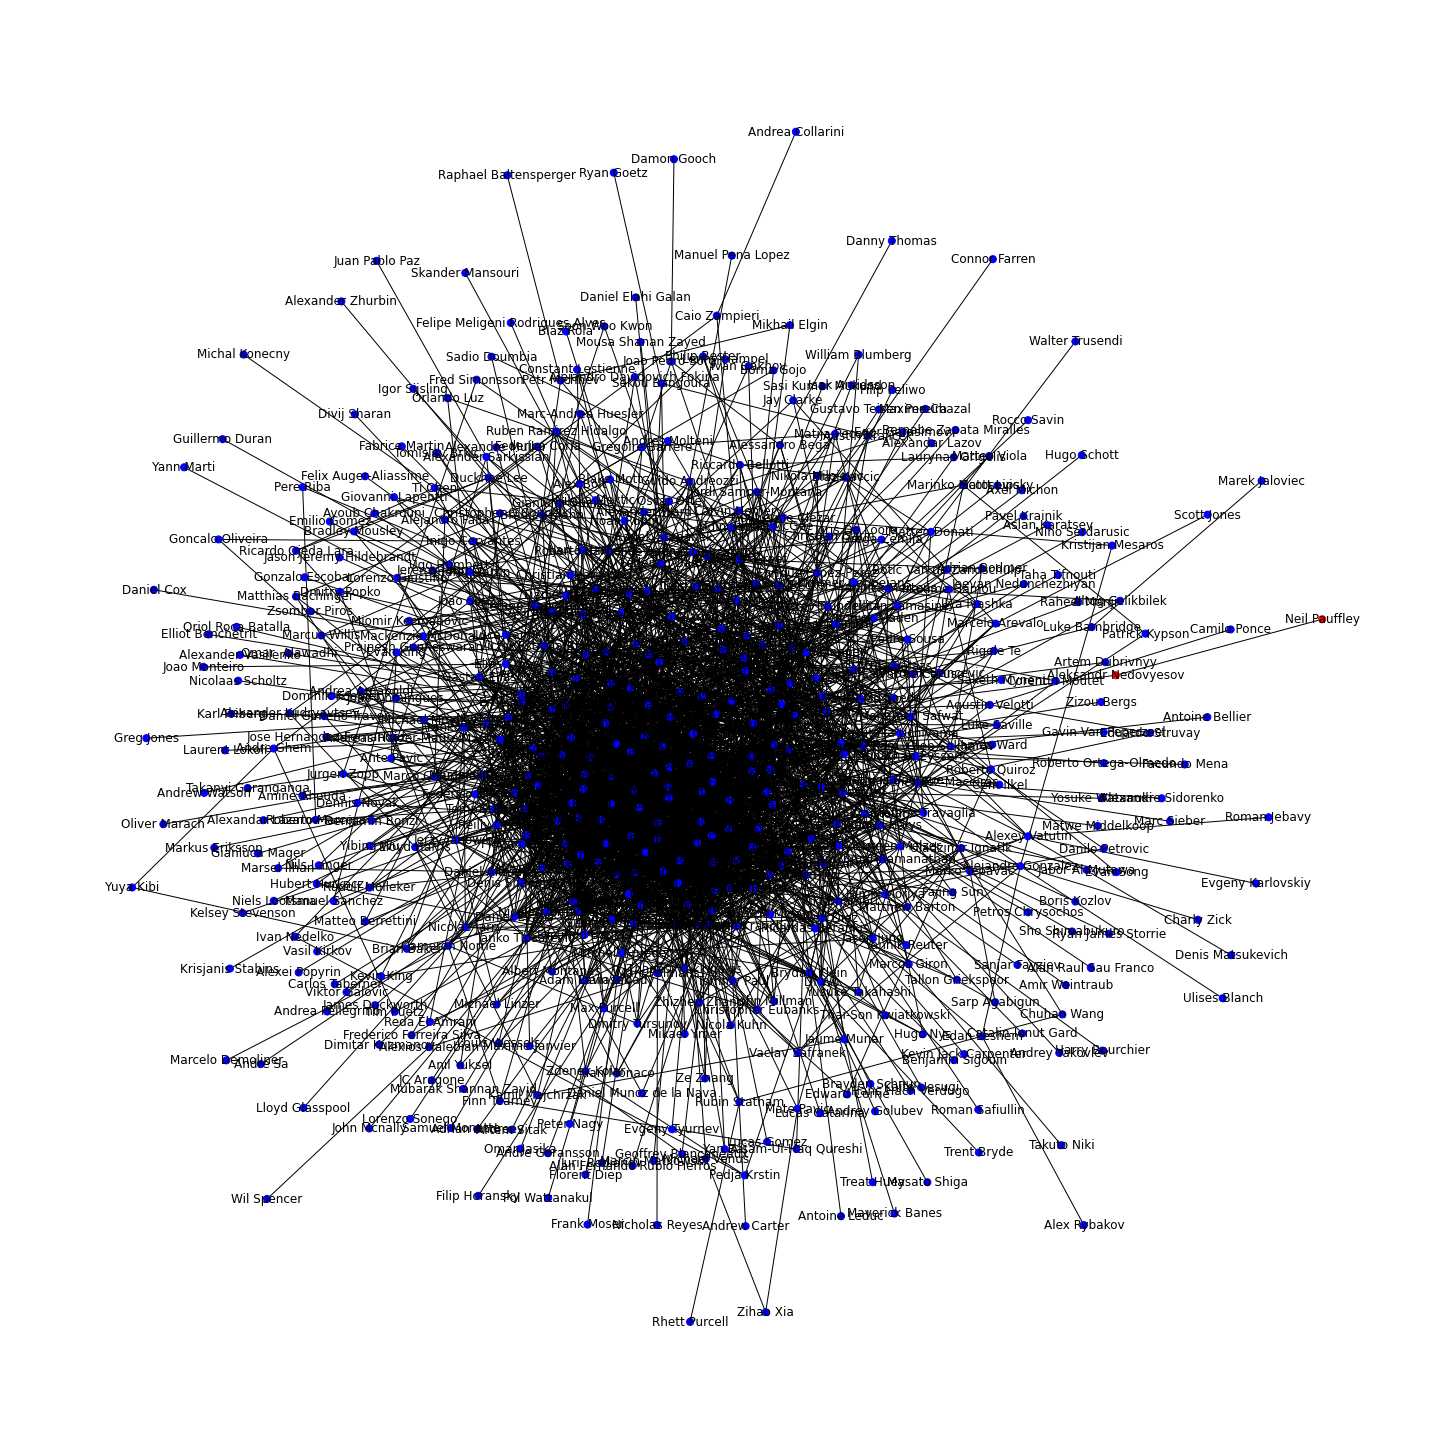

In [ ]:
node_groups = []
for com in next(comunidades):
  node_groups.append(list(com))

print(node_groups)
plt.figure(figsize=(20,20))
color_map = []
for node in G2:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('red')
nx.draw(G2, pos=pos3,node_color=color_map, node_size=50,with_labels=True)
plt.show()

[['Felipe Meligeni Rodrigues Alves', 'Alexios Halebian', 'Oliver Marach', 'Marcel Granollers', 'Duckhee Lee', 'Yoshihito Nishioka', 'Marcelo Arevalo', 'Pedro Sousa', 'Donald Young', 'Omar  Alawadhi', 'Gregoire Barrere', 'John-Patrick Smith', 'Hugo Nys', 'Stefano Travaglia', 'Steve Johnson', 'Dmitry Tursunov', 'Jose Hernandez-Fernandez', 'Yasutaka Uchiyama', 'Oscar Otte', 'Mikael Ymer', 'Guillermo Duran', 'Gilles Muller', 'Yosuke Watanuki', 'Noah Rubin', 'Fajing Sun', 'Samuel Monette', 'Novak Djokovic', 'Denis Matsukevich', 'Maximilian Marterer', 'Maxime Janvier', 'Mikhail Elgin', 'Ivan Nedelko', 'Lucas Catarina', 'Yan Bai', 'Marco Chiudinelli', 'Lorenzo Giustino', 'Evan Song', 'Alexander Ward', 'Carlos Taberner', 'Radek Stepanek', 'Teymuraz Gabashvili', 'Tobias Kamke', 'Mathias Bourgue', 'Rigele Te', 'Sasi Kumar Mukund', 'Henri Laaksonen', 'James McGee', 'Ze Zhang', 'Takanyi Garanganga', 'David Ferrer', 'Arthur De Greef', 'Fred Simonsson', 'Filip Horansky', 'Tommy Haas', 'Nikola Miloje

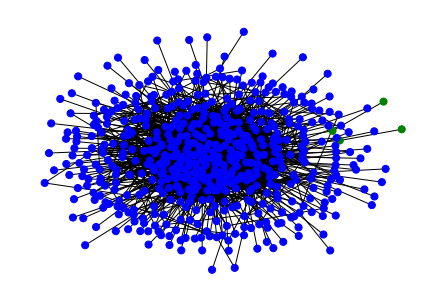

In [ ]:
node_groups = []
for com in next(comunidades):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G2:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')
nx.draw(G2, pos=pos3,node_color=color_map,node_size=50, with_labels=False)
plt.show()

In [ ]:
from community import community_louvain

particiones = community_louvain.best_partition(G2)
print("Modularidad: ",community_louvain.modularity(particiones,G2))
print("La cantidad de grupos es",len(set(particiones.values())))

Modularidad:  0.26012617730471616
La cantidad de grupos es 6


{'Ernesto Escobedo': 0, 'Adam Pavlasek': 0, 'Arthur De Greef': 5, 'Adrian Bodmer': 5, 'Andreas Seppi': 2, 'Adrian Mannarino': 2, 'Benjamin Becker': 3, 'Bjorn Fratangelo': 4, 'Borna Coric': 2, 'Daniil Medvedev': 0, 'David Ferrer': 2, 'Denis Shapovalov': 0, 'Dudi Sela': 2, 'Feliciano Lopez': 2, 'Fernando Verdasco': 2, 'Gael Monfils': 2, 'Go Soeda': 3, 'Guillermo Garcia-Lopez': 2, 'Hyeon Chung': 2, 'Jared Donaldson': 2, 'Jason Jung': 3, 'Jaume Munar': 1, 'Jiri Vesely': 2, 'Jordan Thompson': 2, 'Jo-Wilfried Tsonga': 2, 'Juan Monaco': 0, 'Lucas Catarina': 2, 'Lukas Rosol': 3, 'Marin Cilic': 2, 'Milos Raonic': 2, 'Mohamed Safwat': 5, 'Paolo Lorenzi': 2, 'Ricardas Berankis': 4, 'Robin Haase': 2, 'Ruben Bemelmans': 3, 'Salvatore Caruso': 4, 'Sam Querrey': 2, 'Santiago Giraldo': 0, 'Taylor Fritz': 4, 'Yuichi Sugita': 1, 'Chuhan Wang': 3, 'Adrian Menendez-Maceiras': 3, 'Daniel Brands': 5, 'Marc Sieber': 3, 'Patrick Kypson': 4, 'Rigele Te': 3, 'Stefan Kozlov': 3, 'Tobias Kamke': 3, 'Camilo Ponce'

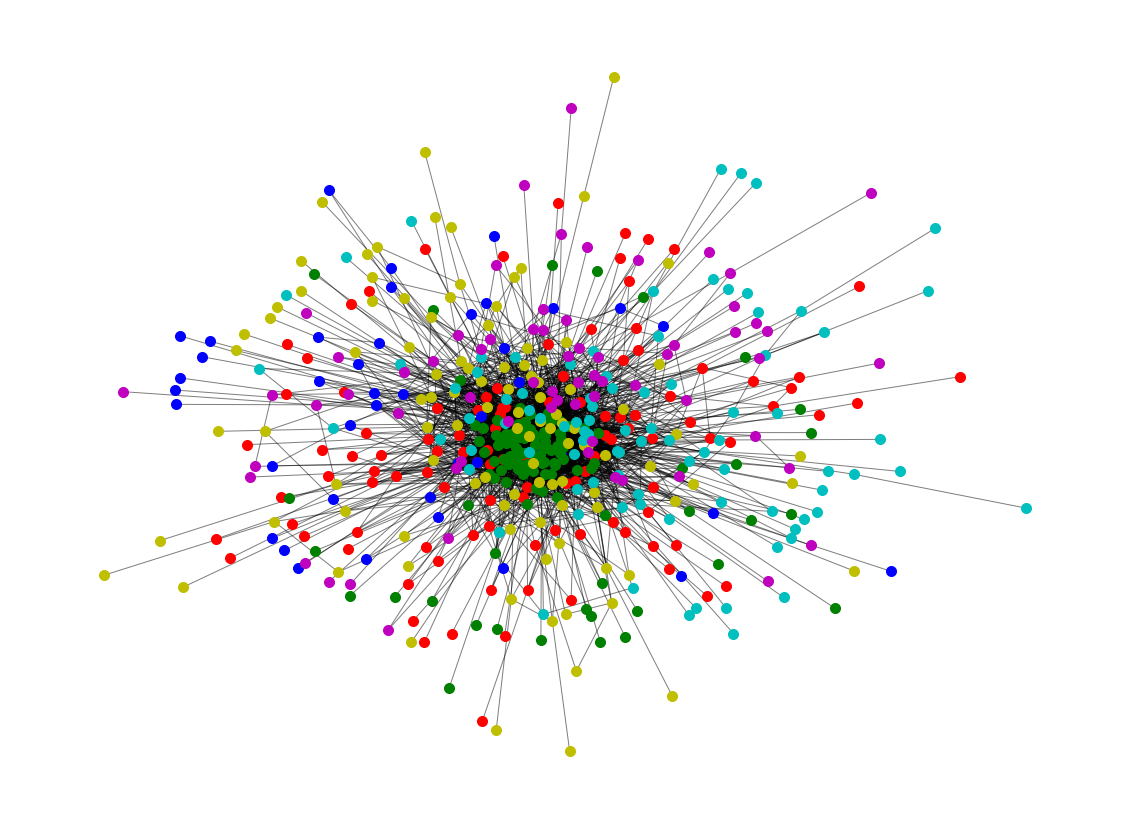

In [ ]:
#imprimir particiones
print(particiones)
#parámetros de la figura
plt.figure(figsize=(20,15))
plt.axis('off')

#colores
c = 'rbgycmk'
pos4 = nx.spring_layout(G2)

#dibujar cada comunidad
i = 0
for com in set(particiones.values()):
  list_nodes = [nodo for nodo in particiones.keys() if particiones[nodo] == com]
  nx.draw_networkx_nodes(G2, pos4, list_nodes, node_size=100, node_color=c[i])
  i=i + 1

#dibujar aristas
nx.draw_networkx_edges(G2, pos4, alpha=0.5)

{'Ernesto Escobedo': 0, 'Adam Pavlasek': 0, 'Arthur De Greef': 5, 'Adrian Bodmer': 5, 'Andreas Seppi': 2, 'Adrian Mannarino': 2, 'Benjamin Becker': 3, 'Bjorn Fratangelo': 4, 'Borna Coric': 2, 'Daniil Medvedev': 0, 'David Ferrer': 2, 'Denis Shapovalov': 0, 'Dudi Sela': 2, 'Feliciano Lopez': 2, 'Fernando Verdasco': 2, 'Gael Monfils': 2, 'Go Soeda': 3, 'Guillermo Garcia-Lopez': 2, 'Hyeon Chung': 2, 'Jared Donaldson': 2, 'Jason Jung': 3, 'Jaume Munar': 1, 'Jiri Vesely': 2, 'Jordan Thompson': 2, 'Jo-Wilfried Tsonga': 2, 'Juan Monaco': 0, 'Lucas Catarina': 2, 'Lukas Rosol': 3, 'Marin Cilic': 2, 'Milos Raonic': 2, 'Mohamed Safwat': 5, 'Paolo Lorenzi': 2, 'Ricardas Berankis': 4, 'Robin Haase': 2, 'Ruben Bemelmans': 3, 'Salvatore Caruso': 4, 'Sam Querrey': 2, 'Santiago Giraldo': 0, 'Taylor Fritz': 4, 'Yuichi Sugita': 1, 'Chuhan Wang': 3, 'Adrian Menendez-Maceiras': 3, 'Daniel Brands': 5, 'Marc Sieber': 3, 'Patrick Kypson': 4, 'Rigele Te': 3, 'Stefan Kozlov': 3, 'Tobias Kamke': 3, 'Camilo Ponce'

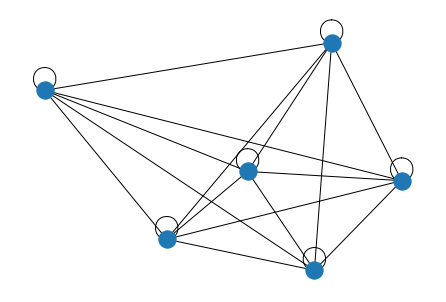

In [ ]:
G3 = community_louvain.induced_graph(particiones,G2)
nx.draw(G3)
#
print(particiones)
def recuperar_comunidad(particiones,i):
  return [nodo for nodo in particiones.keys() if particiones[nodo] == i]
print("comunidad 1:",recuperar_comunidad(particiones,0))
print("comunidad 2:",recuperar_comunidad(particiones,1))
print("comunidad 3:",recuperar_comunidad(particiones,2))
print("comunidad 4:",recuperar_comunidad(particiones,3))
print("comunidad 5:",recuperar_comunidad(particiones,4))
print("comunidad 6:",recuperar_comunidad(particiones,5))

In [ ]:
dendo = community_louvain.generate_dendrogram(G2)
for level in range(len(dendo) - 1) :
  print("partition at level", level, "is", community_louvain.partition_at_level(dendo, level))

partition at level 0 is {'Ernesto Escobedo': 46, 'Adam Pavlasek': 81, 'Arthur De Greef': 13, 'Adrian Bodmer': 73, 'Andreas Seppi': 78, 'Adrian Mannarino': 78, 'Benjamin Becker': 73, 'Bjorn Fratangelo': 81, 'Borna Coric': 78, 'Daniil Medvedev': 78, 'David Ferrer': 78, 'Denis Shapovalov': 78, 'Dudi Sela': 78, 'Feliciano Lopez': 78, 'Fernando Verdasco': 78, 'Gael Monfils': 78, 'Go Soeda': 73, 'Guillermo Garcia-Lopez': 78, 'Hyeon Chung': 78, 'Jared Donaldson': 78, 'Jason Jung': 42, 'Jaume Munar': 2, 'Jiri Vesely': 32, 'Jordan Thompson': 78, 'Jo-Wilfried Tsonga': 78, 'Juan Monaco': 66, 'Lucas Catarina': 78, 'Lukas Rosol': 32, 'Marin Cilic': 78, 'Milos Raonic': 78, 'Mohamed Safwat': 30, 'Paolo Lorenzi': 32, 'Ricardas Berankis': 73, 'Robin Haase': 32, 'Ruben Bemelmans': 73, 'Salvatore Caruso': 59, 'Sam Querrey': 78, 'Santiago Giraldo': 32, 'Taylor Fritz': 73, 'Yuichi Sugita': 11, 'Chuhan Wang': 19, 'Adrian Menendez-Maceiras': 41, 'Daniel Brands': 43, 'Marc Sieber': 41, 'Patrick Kypson': 44, '

**Pregunta 3.2: Explique las diferencias de los diferentes resultados en la pregunta 3.1.**

Tanto en la Comunidad Girvan Neuman como en la Comunidad Louvain, no era claro la división de comunidades. En el primer caso, los nodos se encontraban muy agrupados y apenas era notoria la separación. En cambio en la Comunidad Louvain, no se aprecia a simple vista la separación de comunidades, debido a que algunos jugadores no se llegaron a enfrentar a todos los rivales. En este caso, el método del gráfico inducido Comunidad Louvain si nos permite ver las 8 comunidades calculadas en la partición.

**Pregunta 3.3: Explique las comunidades en sus redes**

En este caso las 8 comunidades de la Red Compleja ATP, se representa mejor mediante el método del gráfico inducido Comunidad Louvain. Comunidad 1	con 148 jugadores; Comunidad 2 con	86 jugadores; Comunidad 3 con	25 jugadores; Comunidad 4	con 100 jugadores; Comunidad 5	con 71 jugadores; Comunidad 6	con 29 jugadores; Comunidad 7	con 40 jugadores; Comunidad 8	con 29 jugadores. Los que tienen mejor Pagerank se encuentran dentro de la Comunidad 4 (Rafael Nadal, David Goffin, Alexander Zverev, Roberto Bautista Agut y Dominic Thiem).